In [1]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from matplotlib import ticker
from math import cos, sin, atan

%matplotlib inline
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

**Question 1)** 

1) and 2): Below, we plot the network (1) and give its mathematical equation (2).

![title](NeuralNetwork.jpg)

3) Below, we write ff_n_2_Relu(...) that returns the forward pass probabilities for the given input.

In [2]:
#Here, we write ff_n_2_Relu(...) that returns the forward pass probabilities for the given input.
def ff_nn_2_ReLu(x, w1, w2, v, b_1, b_2, c):
    
    #A simple 3 layer neural network with sigmoid activation and binary output.
    h1 = calculate_relu(np.dot(x,w1) + b_1) #first layer 
    h2 = calculate_relu(np.dot(h1, w2) + b_2) #second layer
    y = calculate_softmax(np.dot(h2, v) + c) #third layer
    
    return np.array(y)



In [3]:
#Initialize all the units in the input and hidden layers.
x = np.array([[1,-1], [0, -1], [0,1]])
print("x:", x)
print()

w1 = np.array([[1,-1,0], [0, 0, 0.5]])
print("w1:", w1)
print()

w2 = np.array([[1,-1], [0, -1], [0,0]])
print("w2:", w2)
print()

v = np.array([[1,0,-1],[1,0,-1]])
print("v:", v)
print()

b1 = np.array([0,0,1])
b2 = np.array([1,-1])
c = np.array([1,0,0])


x: [[ 1 -1]
 [ 0 -1]
 [ 0  1]]

w1: [[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]

w2: [[ 1 -1]
 [ 0 -1]
 [ 0  0]]

v: [[ 1  0 -1]
 [ 1  0 -1]]



In [4]:
#Define the softmax function.
def calculate_softmax(logits):
    exps = [np.exp(i) for i in logits]
    sum_of_exps = sum(exps)
    softmax = [j/sum_of_exps for j in exps]
    return softmax

In [5]:
#Define the ReLu function. 
def calculate_relu(input):
    answer = []
    for row in input: 
        out = []
        for element in np.nditer(row):
            out.append(max(0, element))
        answer.append(np.array(out)) 
    return np.array(answer)

4) The class probabilities associated with the forward pass are as follows.

In [6]:
#Calculting the results of the forward-pass.
print("The class probabilities associated with the forward pass of each sample are:\n", ff_nn_2_ReLu(x, w1, w2, v, b1, b2, c))

The class probabilities associated with the forward pass of each sample are:
 [[0.57611688 0.33333333 0.1553624 ]
 [0.21194156 0.33333333 0.4223188 ]
 [0.21194156 0.33333333 0.4223188 ]]


**Question 2)**

1) The partial derivatives are: df_dx = 400*(x^3) - 400*x*y + 2*x - 2 and 
   df_dy = 200*y - 200*(x^2). 
    
   The mathematical steps I used to arrive at these partial derivatives is in the file called "Rosenbrock_Partial_Derivatives_Work.jpg" in the directory.

In [7]:
def f(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

2) The visualization of the contours of the Rosenbrock function is below.

(-1.0, 2)

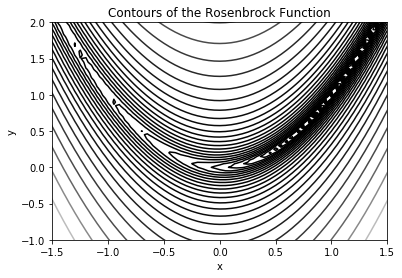

In [8]:
plt.clf()
x = np.arange(-2.0, 2.05, 0.05)
y = np.arange(-2.0, 3.05, 0.05)
X, Y = np.meshgrid(x, y)

plt.contour(X,Y,f(X,Y),np.logspace(-1, 3, 31),cmap='gray')
plt.title("Contours of the Rosenbrock Function")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.5, 1.5)
plt.ylim(-1., 2)

3) Below, is the Gradient Descent algorithm for finding the minimum of the Rosenbrock function, as well the visualizations for different learning rates.

In [9]:
def calculate_grad(vector):
    x, y = vector
    df_dx = 400*(x**3) - 400*x*y + 2*x - 2
    df_dy = 200*y - 200*(x**2)
    
    return np.array([df_dx, df_dy])

In [10]:
def grad_descent(coordinates=None, iterations=10, learning_rate=1e-2):
    if coordinates == None:
        x_y = np.random.uniform(-1,1,size=2) #create a random input vector for x and y.
    else:
        x_y = coordinates
    
    trajectory = [x_y]
    for i in range(0,iterations):
        grad = calculate_grad(x_y)
        x_y = x_y - learning_rate*grad
        trajectory.append(x_y)
    
    return np.array(trajectory)


In [11]:
def draw_contours_gradient_descent(iterations, learning_rate):
    plt.clf()

    np.random.seed(123)
    trajectory = grad_descent(iterations=iterations,learning_rate = learning_rate)
    
    fig, ax = plt.subplots()
    ax.contourf(X, Y, f(X, Y), np.logspace(-1, 3, 40), cmap='gray_r')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1., 2.)

    x = trajectory[:,0]
    y = trajectory[:,1]
    title_string = "Contours of Rosenbrock Function with Learning Rate of " + str(learning_rate)
    plt.title(title_string)
    plt.plot(x,y,'-o')

<Figure size 432x288 with 0 Axes>

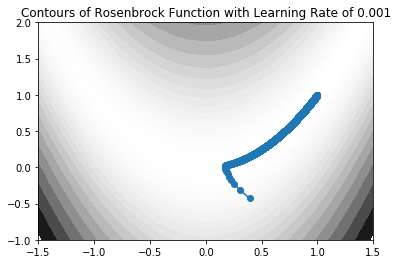

In [12]:
#Learning rate: 0.001
draw_contours_gradient_descent(12000, 0.001)

<Figure size 432x288 with 0 Axes>

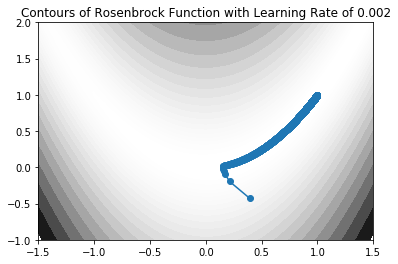

In [13]:
#Learning rate: 0.002
draw_contours_gradient_descent(12000, 0.002)


<Figure size 432x288 with 0 Axes>

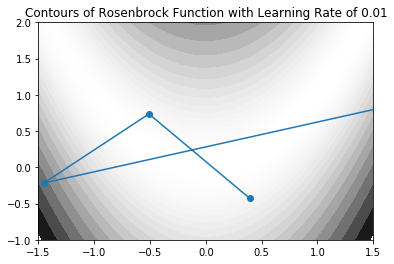

In [14]:
#Learning rate: 0.01
draw_contours_gradient_descent(12000, 0.01)


<Figure size 432x288 with 0 Axes>

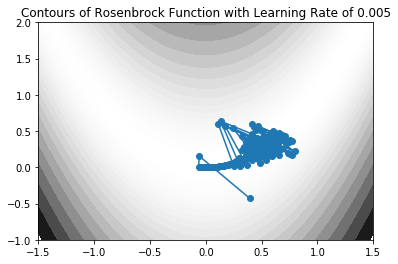

In [15]:
draw_contours_gradient_descent(12000, 0.005)

4) Below, we write a Gradient Descent With Momentum algorithm for finding the minimum of the Rosenbrock function. Then, we create visualizations for different values of the hyperparameters.

In [16]:
def gradient_descent_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point == None:
        x_y = np.random.uniform(-1,1, size=2) #create a random input vector for x and y.

    else:
        x_y = starting_point
        
    trajectory = [x_y]
    vector = np.array([0,0])

    for i in range(iterations):
        grad = calculate_grad(x_y)
        vector = alpha*vector + epsilon * grad
        
        x_y = x_y - vector
        trajectory.append(x_y)
            
    return np.array(trajectory)

In [17]:
def draw_contours_gradient_descent_momentum(iterations, alpha, epsilon):
    plt.clf()

    np.random.seed(123)
    trajectory = gradient_descent_momentum(iterations = iterations, alpha = alpha, epsilon = epsilon)
    
    fig, ax = plt.subplots()
    ax.contourf(X, Y, f(X, Y), np.logspace(-1, 3, 40), cmap='gray_r')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1., 2.)

    x = trajectory[:,0]
    y = trajectory[:,1]
    title_string = "Contours of Rosenbrock Function with Momentum - {alpha: " + str(alpha) + ", epsilon: " + str(epsilon) + "}"
    plt.title(title_string)
    plt.plot(x,y,'-o')

<Figure size 432x288 with 0 Axes>

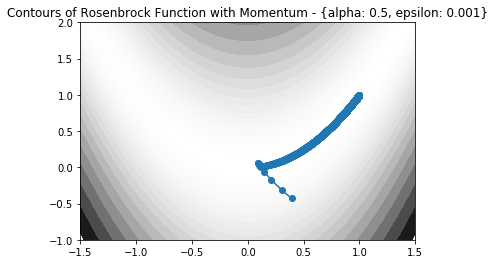

In [18]:
iterations = 12000
alpha = 0.5
epsilon = 0.001
draw_contours_gradient_descent_momentum(iterations, alpha, epsilon)


<Figure size 432x288 with 0 Axes>

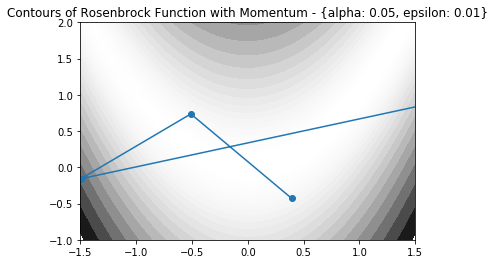

In [19]:
iterations = 12000
alpha = 0.05
epsilon = 0.01
draw_contours_gradient_descent_momentum(iterations, alpha, epsilon)

<Figure size 432x288 with 0 Axes>

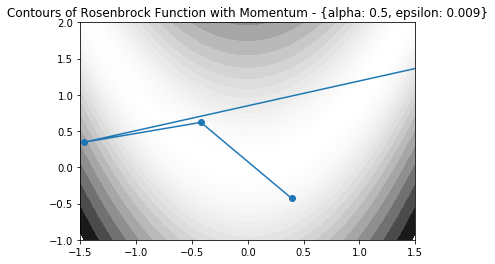

In [20]:
iterations = 12000
alpha = 0.5
epsilon = 0.009
draw_contours_gradient_descent_momentum(iterations, alpha, epsilon)

<Figure size 432x288 with 0 Axes>

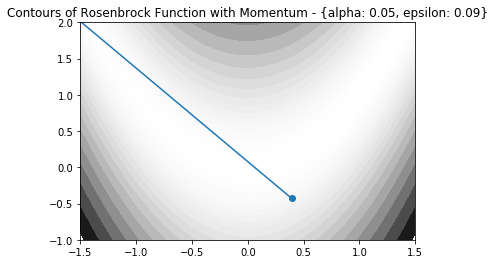

In [21]:
iterations = 12000
alpha = 0.05
epsilon = 0.09
draw_contours_gradient_descent_momentum(iterations, alpha, epsilon)

**Question 3.)**

1) The gradients of the loss function are as follows:

a) dL/dV = H2</sub><sup>T</sup> * -e<sub>i</sub>

b) dL/W2 = H1</sub><sup>T</sup> * ( (-e<sub>i</sub> * V<sup>T</sup>) ∘ H<sub>2</sub>>0)

c) dL/W1 = X<sup>T</sup> *( ( ( (-e<sub>i</sub> * V<sup>T</sup>) ∘ H<sub>2</sub>>0) * W2<sup>T</sup>) ∘ (H1 > 0) )

d) dL/c = -e<sub>i</sub>

e) dL/b1 =   ( ( (   (-e<sub>i</sub> * V<sup>T</sup>) ) ∘ (H<sub>2</sub>>0) ) * W2<sup>T</sup>) ∘ (H1 > 0) 


f) dL/b2 = ( (-e<sub>i</sub> * V<sup>T</sup>) ∘ H<sub>2</sub>>0)




The mathematical steps I took to arrive at these equations are in the file called 'BackPropWork.jpg' in this directory.

In [22]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

In [23]:
def yhat(x, y, params):
    W1 = params[0:6].reshape(2,3)
    W2 = params[6:12].reshape(3,2)
    V = params[12:18].reshape(2,3)
    b1 = params[18:21].reshape(1,3)
    b2 = params[21:23].reshape(1,2)
    c = params[23:26].reshape(1,3)
    
    h1 = relu(np.dot(x,W1) + b1) #first layer 
    h2 = relu(np.dot(h1, W2) + b2) #second layer
    y = softmax(np.dot(h2, V) + c) #third layer
    
    return y

In [24]:
def relu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

2) Below, we implement the function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [25]:
def grad_f(parameters, x, y):
    
    W1 = parameters[:6].reshape(2,3)
    W2 = parameters[6:12].reshape(3,2)
    V = parameters[12:18].reshape(2,3)
    b1 = parameters[18:21].reshape(1,3)
    b2 = parameters[21:23].reshape(1,2)
    c = parameters[23:26].reshape(1,3)
    
    h1 = relu(np.dot(x,W1) + b1) #first layer 
    h2 = relu(np.dot(h1, W2) + b2) #second layer
    y_hat = softmax(np.dot(h2, V) + c) #third layer
    
    #d_c = (y_hat - y).sum(axis=0)
    error_layer_3 = (y_hat - y).sum(axis=0)
    error_layer_2 = (y_hat - y).dot(V.T) * (h2>0)
    error_layer_1 = error_layer_2.dot(W2.T) * (h1>0)
    
    d_V = (h2.T).dot(y_hat - y)
    d_W2 = (h1.T).dot(error_layer_2)
    d_W1 = x.T.dot(error_layer_1)
    
    d_c = error_layer_3
    d_b2 = (error_layer_2).sum(axis=0)
    d_b1 = (error_layer_1).sum(axis=0)
    
    #Now, we will return the gradient with respect to each parameter at the given point x.
    dw_list = list(d_W1.reshape(6,)) + list(d_W2.reshape(6,)) + list(d_V.reshape(6,))
    db_list = list(d_b1.reshape(3,)) + list(d_b2.reshape(2,)) + list(d_c.reshape(3,))
    
    grad = np.array( dw_list + db_list )
    return grad

3) Now, we will generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters specified on the instruction sheet. We will plot the sample dataset, in which we color the data points by their respective class. 

In [26]:
def gen_gmm_data(n = 12000, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [27]:
x, y, cl = gen_gmm_data(n = 500, plot=False)

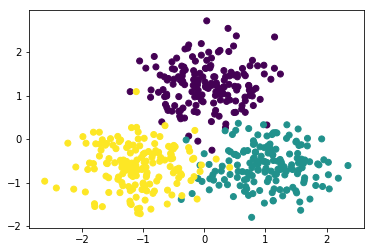

In [28]:
new_c = cl[0]
plt.scatter(x[:,0], x[:,1], c=new_c)

4) Here, we will plot the neural network using Gradient Descent, and plot the results. 

In [29]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    parameters = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [parameters]
    losses = [loss(y, yhat(x, y, parameters))]
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        parameters = parameters - learning_rate * grad
        trajectory.append(parameters)
        losses.append(loss(y, yhat(x, y, parameters)))
    return (np.array(trajectory), losses)

Text(0,0.5,'Loss')

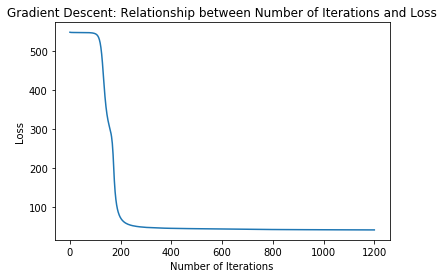

In [30]:
trajectory, losses = grad_descent(x, y, iterations = 1200, learning_rate = 1e-3)
plt.plot(losses)
plt.title("Gradient Descent: Relationship between Number of Iterations and Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")

5) Now, we will use Gradient Descent with Momentum and then graph the total Loss of each iteration.

In [31]:
#Now, we are repeating the exercise using Gradient Descent with Momentum. 
def grad_descent_momentum(x, y,  iterations=10, epsilon = 1e-3, alpha =0.9):
    parameters = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [parameters]
    losses = [loss(y, yhat(x, y, parameters))]
    vector = np.zeros(parameters.size)
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        vector = alpha * vector + epsilon * grad
        parameters = parameters - vector
        trajectory.append(parameters)
        losses.append(loss(y, yhat(x, y, parameters)))
        
    return (np.array(trajectory), losses)

Text(0,0.5,'Loss')

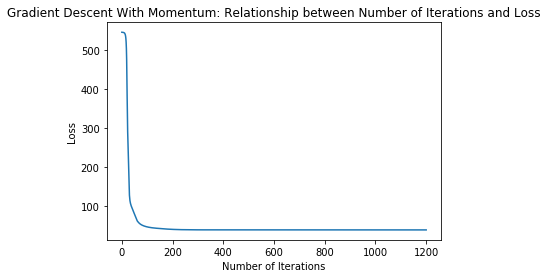

In [32]:
trajectory, losses = grad_descent_momentum(x, y, iterations = 1200, epsilon = 1e-3, alpha = 0.8)
plt.plot(losses)
plt.title("Gradient Descent With Momentum: Relationship between Number of Iterations and Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")

When we compare the plots between Gradient Descent and Gradient Descent with Momentum, both of which graph the Loss at each iteration, we can see that the Gradient Descent with Momentum seems to converge quicker. Gradient Descent with Momentum tries to accelerate learning, typically when the loss function has high curvature, or if there are small but consistent gradients, or noisy gradients. The momentum method does so by keeping track of a velocity vector that indicates the direction we were recently moving in the parameter space. Eventually, the velocity vector adds up all of the previous gradients. When we update the parameter space using the momentum method, the update is a weighted sum of the gradient and the previous direction of motion. The hyperparameter alpha ranges from 0 to 1, and it indicates how much the contributions of the past gradients should influence the current direction.

Here, we let alpha equal to 0.8, which indicates that the past gradients will have more influence in terms of current direction. When we keep the value of epsilon equal to 0.001 and the number of iterations for both set at 1200, we see that the graph of Gradient Descent with Momentum is steeper between iterations 0 and 200. In comparision, the graph of Gradient Descent without Momentum is relatively flatter between iterations 0 and 200. We see that in the first graph, the Loss remains high and flat for almost 200 iterations before it starts to decrease (by the 200th iteration). On the other hand, in the second graph, the Loss decreases much faster, using very few iterations. This means that the Gradient Descent With Momentum was able to go from a high Loss to a low Loss much faster than regular Gradient Descent. Thus, we can conclude that Gradient Descent With Momentum converges much faster and more efficiently than just Gradient Descent. 

